<b> Machine Learning Assignment 3, by Nicholas Ilow March 12 2019</b>

In [1]:
# IMPORTS
%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression as LRC
from sklearn.neural_network import MLPClassifier as NC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import multivariate_normal
from scipy.stats import expon
from scipy.stats import poisson
from scipy.stats import genlogistic
import time as t
import pandas as pd

C:\Users\Nic\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<b>Question 1 </b>

In [2]:
# Get mnist Data
mnist = tf.keras.datasets.mnist
(train_data,train_labels),(test_data,test_labels) = mnist.load_data()

# Flatten the train_data and test_data for faster computation.
train_data = train_data.reshape(train_data.shape[0],train_data.shape[1]*train_data.shape[2])
test_data = test_data.reshape(test_data.shape[0],test_data.shape[1]*test_data.shape[2])

# If the datatype of the above arrays is int8, convert them to float/int 32/64.
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale data between 0 and 1
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)


In [3]:
#  SVM

tstart = t.time()
SupportVector = LinearSVC()
parameter_space =   {
    'C': [.01,.1,1,10],
    'loss': ['hinge','squared_hinge'],
}

clfSVC = GridSearchCV(SupportVector,parameter_space,n_jobs=-1,cv=5)
clfSVC.fit(train_data,train_labels)
tend = t.time()
print('This code took:',(tend-tstart)/60,' minutes to run')
print('Best parameters found:\n', clfSVC.best_params_)
print('The score of the best parameters found was: \n' , clfSVC.best_score_)


This code took: 59.98214891751607  minutes to run
Best parameters found:
 {'C': 0.1, 'loss': 'hinge'}
The score of the best parameters found was: 
 0.9120666666666667


In [4]:
#  RANDOM FOREST

tstart = t.time()
RandomForest = RFC()
parameter_space =   {
    'n_estimators': [1,5,10,20],
    'criterion': ['gini','entropy'],
    'min_samples_leaf': [1,4,16,64],
    'max_depth': [10,20,40,80,None],
}
clfRFC = GridSearchCV(RandomForest, parameter_space, n_jobs=-1, cv=5)
clfRFC.fit(train_data,train_labels)
tend = t.time()
print('This code took:',(tend-tstart)/60,' minutes to run')
print('Best parameters found:\n', clfRFC.best_params_)
print('The score of the best parameters found was: \n' , clfRFC.best_score_)



This code took: 11.76394325097402  minutes to run
Best parameters found:
 {'criterion': 'entropy', 'max_depth': 40, 'min_samples_leaf': 1, 'n_estimators': 20}
The score of the best parameters found was: 
 0.9577833333333333


In [5]:
#  LINEAR CLASSIFIER

tstart = t.time()
LogisticRegression = LRC()
parameter_space =   {
    'C': [.01,.1,1,10],
    'solver': ['liblinear','sag','saga'],
}
clfLRC = GridSearchCV(LogisticRegression, parameter_space, n_jobs=-1, cv=5)
clfLRC.fit(train_data,train_labels)
tend = t.time()
print('This code took:',(tend-tstart)/60,' minutes to run')
print('Best parameters found:\n', clfLRC.best_params_)
print('The score of the best parameters found was: \n' , clfLRC.best_score_)

This code took: 129.74810399611792  minutes to run
Best parameters found:
 {'C': 1, 'solver': 'liblinear'}
The score of the best parameters found was: 
 0.9108666666666667


In [6]:
#  NEURAL NET
tstart = t.time()
MLP = NC()
parameter_space =   {
    'learning_rate_init': [0.0001,0.001,0.01,.1],
    'alpha': [.00001,0.0001,.001],
    'hidden_layer_sizes': [(50,),(100,),(150,)],
}
clfMLP = GridSearchCV(MLP, parameter_space, n_jobs=-1, cv=5)
clfMLP.fit(train_data,train_labels)
tend = t.time()
print('This code took:',(tend-tstart)/60,' minutes to run')
print('Best parameters found:\n', clfMLP.best_params_)
print('The score of the best parameters found was: \n' , clfMLP.best_score_)

This code took: 97.09083791176478  minutes to run
Best parameters found:
 {'alpha': 0.0001, 'hidden_layer_sizes': (150,), 'learning_rate_init': 0.001}
The score of the best parameters found was: 
 0.9718333333333333


<b> Question 1b </b>

From the scores of the best parameters of each classifier we see that the Neural Network Classifier performed the best. It was also relatively fast in terms of computation time compared to the linear classifier and SVM. The Random Forest classifier was the next best, and results could be improved by further increasing n_estimators, but not to the point of the accuracy of the neural net classifier. The best parameters for each of these classifiers are printed above in their respective cells stating what the best varied parameters were for each.

<b> Question 1c </b> 

Looking at the computation times alongside the number of parameter combinations looked at we can see that the easiest classifier to tune is the Random Forest. It may have the most parameter combinations out of the classifiers I looked at, however the computation time was significantly lower than all of the other classifiers regardless of the increased number of combinations of parameters to sweep over.

<b> Question 1d </b> 

I first explain the parameters I explored in words, and then below this cell I have pandas dataframes that are printed that contain the parameter value combinations with their respective training and testing scores.

<b> SVM: </b> 

For this classifier there were 2 parameters/methods that I could vary. I could vary both the way the loss function is calculated, where hinge is the standard loss function used in an SVM according to sklearn's documentation, and squared_hinge is the square of the hinge loss. I could also vary C, which is the penalty parameter of the error term. I took values of C=[.01,.1,1,10] , and checked the results of each value of C with both possible ways of calculating the loss function.

<b> Random Forest: </b> 

This classifier has many more tunable parameters. We can look at the max_depth of a given tree, the number of trees in the forest (n_estimators), the minimum amount of remaining items to classify before a node is considered a leaf in a given tree (min_samples_leaf), and whether we split at each node in a tree using entropy or gini impurity (criterion). For this classifier I explored values of n_estimators in the range of: n_estimators=[1,5,10,20] , min_samples_leaf=[1,4,16,64] , max_depth=[10,20,40,80,None] , where for max_depth=None the tree is expanded until all leaves are pure or in the case where min_samples_leaf!=1 until all leaves have less samples than min_samples_leaf, and finally the two criterion, criterion=['gini','entropy']. Every combination of these parameters was explored, e.g. 4x4x5x2 different parameter combinations, yielding 160 different parameter combinations.

<b> Linear Classifier (Logistic Regression): </b> 

For this classifier we once again had two main things we could tune. C, being a parameter that defines the inverse of regularization strength. We also are able to change what solver we use to find our results. The parameter space explored for this classifier includes C=[.01,.1,1], and solver=['liblinear','sag','saga'], yielding us with every combination of the two parameters, e.g. 3x3=9 different parameter combinations.

<b>Neural Network </b> 

For Neural Networks I looked at a few different hyperparameters, namely the learning rate, alpha (the L2 penalty parameter), and the sizes of the hidden layers. For this classifier I explored every combination of the following set of parameters and their values, e.g. 3x3x3=27 different parameter combinations.
learning_rate_init = [0.001,0.01,.1],
alpha=[.00001,0.0001,.001],
hidden_layer_sizes= [(50,),(100,),(150,)]

<b> Support Vector Parameters/Results </b>

In [7]:
df = pd.DataFrame(clfSVC.cv_results_)[['params','mean_train_score','mean_test_score']]
print(df)

                                 params  mean_train_score  mean_test_score
0          {'C': 0.01, 'loss': 'hinge'}          0.921704         0.907233
1  {'C': 0.01, 'loss': 'squared_hinge'}          0.925663         0.908533
2           {'C': 0.1, 'loss': 'hinge'}          0.930917         0.912067
3   {'C': 0.1, 'loss': 'squared_hinge'}          0.929317         0.908450
4             {'C': 1, 'loss': 'hinge'}          0.931600         0.908417
5     {'C': 1, 'loss': 'squared_hinge'}          0.923625         0.902233
6            {'C': 10, 'loss': 'hinge'}          0.891454         0.872400
7    {'C': 10, 'loss': 'squared_hinge'}          0.892391         0.870783


C:\Users\Nic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Nic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Nic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Nic\Anaconda3\lib\site-packages\sklearn\utils\deprec

<b> Random Forest Parameters/Results </b>

In [8]:
df = pd.DataFrame(clfRFC.cv_results_)[['params','mean_train_score','mean_test_score']]
print(df)

                                                params  mean_train_score  \
0    {'criterion': 'gini', 'max_depth': 10, 'min_sa...          0.811375   
1    {'criterion': 'gini', 'max_depth': 10, 'min_sa...          0.931379   
2    {'criterion': 'gini', 'max_depth': 10, 'min_sa...          0.952471   
3    {'criterion': 'gini', 'max_depth': 10, 'min_sa...          0.960737   
4    {'criterion': 'gini', 'max_depth': 10, 'min_sa...          0.803758   
5    {'criterion': 'gini', 'max_depth': 10, 'min_sa...          0.926867   
6    {'criterion': 'gini', 'max_depth': 10, 'min_sa...          0.947588   
7    {'criterion': 'gini', 'max_depth': 10, 'min_sa...          0.956996   
8    {'criterion': 'gini', 'max_depth': 10, 'min_sa...          0.783413   
9    {'criterion': 'gini', 'max_depth': 10, 'min_sa...          0.916083   
10   {'criterion': 'gini', 'max_depth': 10, 'min_sa...          0.936083   
11   {'criterion': 'gini', 'max_depth': 10, 'min_sa...          0.945779   
12   {'crite

C:\Users\Nic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Nic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Nic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Nic\Anaconda3\lib\site-packages\sklearn\utils\deprec

<b> Logistic Regression Parameters/Results </b>

In [9]:
df = pd.DataFrame(clfLRC.cv_results_)[['params','mean_train_score','mean_test_score']]
print(df)

                                params  mean_train_score  mean_test_score
0   {'C': 0.01, 'solver': 'liblinear'}          0.914562         0.902350
1         {'C': 0.01, 'solver': 'sag'}          0.910242         0.901300
2        {'C': 0.01, 'solver': 'saga'}          0.901896         0.894517
3    {'C': 0.1, 'solver': 'liblinear'}          0.928496         0.910533
4          {'C': 0.1, 'solver': 'sag'}          0.910812         0.901317
5         {'C': 0.1, 'solver': 'saga'}          0.902021         0.894383
6      {'C': 1, 'solver': 'liblinear'}          0.933125         0.910867
7            {'C': 1, 'solver': 'sag'}          0.910883         0.901267
8           {'C': 1, 'solver': 'saga'}          0.902063         0.894300
9     {'C': 10, 'solver': 'liblinear'}          0.934575         0.910467
10          {'C': 10, 'solver': 'sag'}          0.910846         0.901367
11         {'C': 10, 'solver': 'saga'}          0.902033         0.894300


C:\Users\Nic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Nic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Nic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Nic\Anaconda3\lib\site-packages\sklearn\utils\deprec

<b> Neural Network Parameters/Results </b>

In [10]:
df = pd.DataFrame(clfMLP.cv_results_)[['params','mean_train_score','mean_test_score']]
print(df)

                                               params  mean_train_score  \
0   {'alpha': 1e-05, 'hidden_layer_sizes': (50,), ...          0.999962   
1   {'alpha': 1e-05, 'hidden_layer_sizes': (50,), ...          0.998225   
2   {'alpha': 1e-05, 'hidden_layer_sizes': (50,), ...          0.981983   
3   {'alpha': 1e-05, 'hidden_layer_sizes': (50,), ...          0.955954   
4   {'alpha': 1e-05, 'hidden_layer_sizes': (100,),...          0.999996   
5   {'alpha': 1e-05, 'hidden_layer_sizes': (100,),...          0.997608   
6   {'alpha': 1e-05, 'hidden_layer_sizes': (100,),...          0.977100   
7   {'alpha': 1e-05, 'hidden_layer_sizes': (100,),...          0.984633   
8   {'alpha': 1e-05, 'hidden_layer_sizes': (150,),...          1.000000   
9   {'alpha': 1e-05, 'hidden_layer_sizes': (150,),...          0.998196   
10  {'alpha': 1e-05, 'hidden_layer_sizes': (150,),...          0.981717   
11  {'alpha': 1e-05, 'hidden_layer_sizes': (150,),...          0.980917   
12  {'alpha': 0.0001, 'hi

C:\Users\Nic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Nic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Nic\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Nic\Anaconda3\lib\site-packages\sklearn\utils\deprec

<b> Question 1e </b>

<b> SVM: </b> 

I learned that the default model parameter hinge in general behaves better than the squared_hinge loss function when dealing with the MNIST dataset. I also learned that there exists a sweetspot for the penalty parameter C for a data set, because the values of the score for values of C both lower and greater than the selected C were worse than the score for the selected C.

<b> Random Forest: </b> 

I learned that the more estimators e.g. more trees you have the better your results are going to be, this is reflected by the fact that in the set of best parameters we see that the best score is given when n_estimators=20, which is the max value of n_estimators in the set of n_estimators that I swept over. I also learned that for the purposes of dealing with the mnist data set, Gini impurity and entropy seem to perform similarly (on different runs of my code I received both of these as optimal parameters, suggesting that their results are very close in accuracy). I learned from the fact that min_samples_leaf=1 and max_depth=80 that the tree desires to have all leafs be completely pure, e.g. only have a single sample at each leaf, and the tree is large. Other times I have run my code I received max_depth=None as the optimal parameter suggesting that a large depth yields the best result seeing as max_depth=None continues building the tree until all leafs have <= min_samples_leaf samples. It can be seen that the max_depth parameter doesn't change the score significantly as long as you don't make it too small, e.g. it is likely these trees are not hitting the larger max depth limits.

<b> Linear Classifier (Logistic Regression): </b> 

I learned that once again there exists a sweet spot for C seeing as both higher and lower values of C (the penalty parameter) yield worse cross validated scores in comparison to the default value of the model C=1. The liblinear implementation of Logistic Regression yielded the best result, and this seems to be because it handles larger datasets the best according to the sklearn documentation.

<b>Neural Network </b> 

I found that smaller learningrates when large amounts of iterations are allowed yield a generally good result, with limitation seeing as if the learning rate becomes to small then it won't converge, the same occurs if the learning rate is to large, the coefficients will continuously overshoot  when trying to converge and yield a convergence error. The more layers you have the better your classifier will behave, since it is making more connections with regards to the data inputted, however there exists a tradeoff with time for this. 
I learned that the adam solver works best for larger datasets, this is both a result of my experiments aswell as the documentation from sklearn. I also learned that the relu activation function for the hidden layers behaves better, seeing as all 4 functions would have been tested with the optimal other set of parameters and adam came out on top, where relu returns f(x) = max(0,x). Alpha seems to have a sweet spot for a given data set seeing as for the parameter space I swept the largest alpha was chosen, and when I did further experiments with the optimal parameters and larger alpha values I found that the overall score would decrease suggesting that there exists some alpha inbetween/around the optimal alpha found in my parameter sweep that truly maximizes the scoring on the Mnist dataset.

<b> Question 2 </b>

In [11]:
#  Initialize models with the best parameters from question 1

#  Neural Network
bestNC = NC(
    alpha=clfMLP.best_params_['alpha'],
    learning_rate_init=clfMLP.best_params_['learning_rate_init'],
    hidden_layer_sizes=clfMLP.best_params_['hidden_layer_sizes'],
)

#  Random Forest
bestRFC = RFC(
    n_estimators=clfRFC.best_params_['n_estimators'],
    min_samples_leaf=clfRFC.best_params_['min_samples_leaf'],
    max_depth=clfRFC.best_params_['max_depth'],
    criterion=clfRFC.best_params_['criterion'],
)

#  Linear Regression
bestLRC = LRC(
    C=clfLRC.best_params_['C'],
    solver=clfLRC.best_params_['solver'],
)

#  Support Vector
bestSVC = LinearSVC(
    C=clfSVC.best_params_['C'],
    loss=clfSVC.best_params_['loss'],
)


In [12]:
#  Dataset 1
meanList = [.1,.5,.3,.7]
covList = [.2,.5,2,5]
pos = []
labels = []
i = 0
while i<1e5: #  make 1e5 sample points
    x = np.random.uniform(low=-1,high=1)
    idx = np.random.choice(4)
    y = multivariate_normal.pdf(x,mean=meanList[idx],cov=covList[idx])
    pos.append([x,y])
    labels.append(idx)
    i+=1
pos = np.array(pos)
labels = np.array(labels)

scaler = StandardScaler() #  Scale the data for svc and linear regressor to work better
pos = scaler.fit_transform(pos)

In [13]:
#  Testing Models on Dataset 1

print('The accuracy of the Neural Network on multivariate Gaussians is: ',np.mean(cross_val_score(bestNC,pos,labels,cv=5)))

print('The accuracy of the Random Forest on multivariate Gaussians is: ',np.mean(cross_val_score(bestRFC,pos,labels,cv=5)))

print('The accuracy of the Linear Regressor on multivariate Gaussians is: ',np.mean(cross_val_score(bestLRC,pos,labels,cv=5)))

print('The accuracy of the Support Vector on multivariate Gaussians is: ',np.mean(cross_val_score(bestSVC,pos,labels,cv=5)))


The accuracy of the Neural Network on multivariate Gaussians is:  0.9838397429235558
The accuracy of the Random Forest on multivariate Gaussians is:  0.9993699979963002
The accuracy of the Linear Regressor on multivariate Gaussians is:  0.6687400290130489
The accuracy of the Support Vector on multivariate Gaussians is:  0.5074071858144724


In [ ]:
x_min, x_max = pos[:,0].min()-1, pos[:,0].max()+1
y_min, y_max = pos[:,1].min()-1, pos[:,1].max()+1

#  Fit our models with the data
bestNC.fit(pos,labels)
bestRFC.fit(pos,labels)
bestLRC.fit(pos,labels)
bestSVC.fit(pos,labels)

#  Find the decision boundaries
xx, yy = np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
ZNC = bestNC.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
ZRFC = bestRFC.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
ZLRC = bestLRC.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
ZSVC = bestSVC.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

Text(0.5,1,'Support Vector Decision Boundaries')

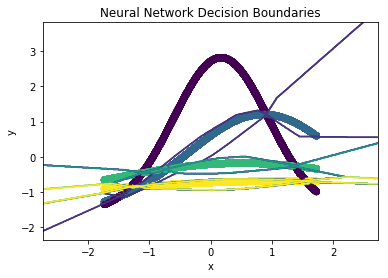

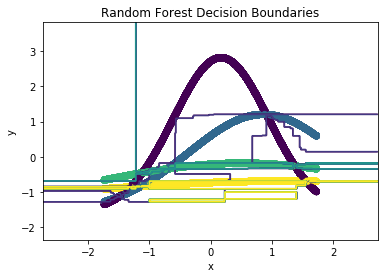

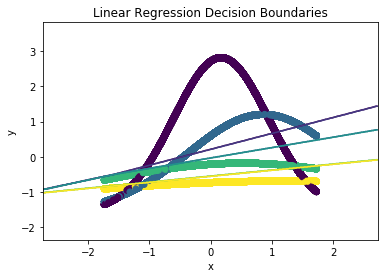

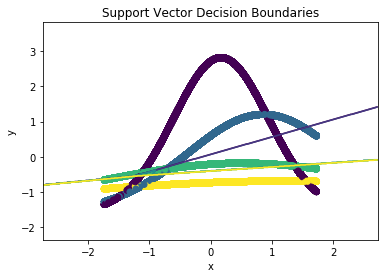

In [31]:
plt.figure()
plt.contour(xx,yy,ZNC,alpha=1)
plt.scatter(pos[:,0],pos[:,1],c=labels)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Decision Boundaries')

plt.figure()
plt.contour(xx,yy,ZRFC,alpha=1)
plt.scatter(pos[:,0],pos[:,1],c=labels)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Forest Decision Boundaries')

plt.figure()
plt.contour(xx,yy,ZLRC,alpha=1)
plt.scatter(pos[:,0],pos[:,1],c=labels)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Decision Boundaries')

plt.figure()
plt.contour(xx,yy,ZSVC,alpha=1)
plt.scatter(pos[:,0],pos[:,1],c=labels)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Support Vector Decision Boundaries')

## Thick data is synthetic data, thin lines are decision boundaries

In [15]:
#  Dataset 2

slopeList = [1,3,5,10]
interceptList = [.05,.3,2,1]
i = 0
pos2 = []
labels2 = []

while i<1e5:
    x = np.random.uniform(low=-10,high=10)
    idx = np.random.choice(4)
    y = slopeList[idx]*x+interceptList[idx]
    pos2.append([x,y])
    labels2.append(idx)
    i+=1
pos2 = np.array(pos2)
labels2 = np.array(labels2)

scaler = StandardScaler()  #  Scale the data for svc and linear regressor to work better
pos2 = scaler.fit_transform(pos2)

In [16]:
#  Testing the 4 models on Dataset 2


print('The accuracy of the Neural Network on different lines is: ',np.mean(cross_val_score(bestNC,pos2,labels2,cv=5)))

print('The accuracy of the Random Forest on different lines is: ',np.mean(cross_val_score(bestRFC,pos2,labels2,cv=5)))

print('The accuracy of the Linear Regressor on different lines is: ',np.mean(cross_val_score(bestLRC,pos2,labels2,cv=5)))

print('The accuracy of the Support Vector on different lines is: ',np.mean(cross_val_score(bestSVC,pos2,labels2,cv=5)))


The accuracy of the Neural Network on different lines is:  0.998509999993
The accuracy of the Random Forest on different lines is:  0.999280000496675
The accuracy of the Linear Regressor on different lines is:  0.3714700566549968
The accuracy of the Support Vector on different lines is:  0.2719180964750809


In [32]:
x_min, x_max = pos2[:,0].min()-1, pos2[:,0].max()+1
y_min, y_max = pos2[:,1].min()-1, pos2[:,1].max()+1

#  Fit our models with the data
bestNC.fit(pos2,labels2)
bestRFC.fit(pos2,labels2)
bestLRC.fit(pos2,labels2)
bestSVC.fit(pos2,labels2)

#  Find the decision boundaries
xx, yy = np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
ZNC = bestNC.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
ZRFC = bestRFC.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
ZLRC = bestLRC.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
ZSVC = bestSVC.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

Text(0.5,1,'Support Vector Decision Boundaries')

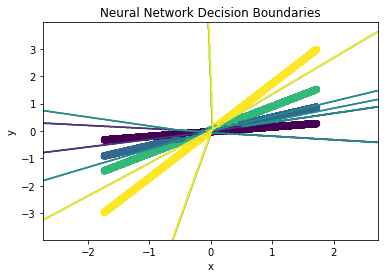

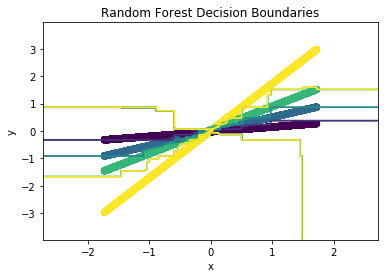

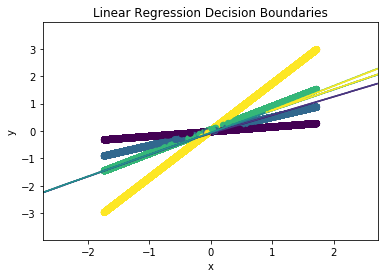

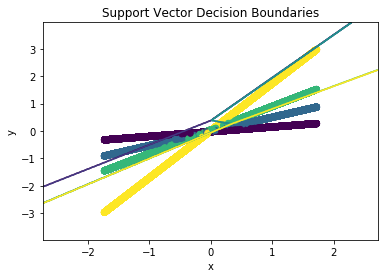

In [33]:
plt.figure()
plt.contour(xx,yy,ZNC,alpha=1)
plt.scatter(pos2[:,0],pos2[:,1],c=labels2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Decision Boundaries')

plt.figure()
plt.contour(xx,yy,ZRFC,alpha=1)
plt.scatter(pos2[:,0],pos2[:,1],c=labels2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Forest Decision Boundaries')

plt.figure()
plt.contour(xx,yy,ZLRC,alpha=1)
plt.scatter(pos2[:,0],pos2[:,1],c=labels2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Decision Boundaries')

plt.figure()
plt.contour(xx,yy,ZSVC,alpha=1)
plt.scatter(pos2[:,0],pos2[:,1],c=labels2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Support Vector Decision Boundaries')

## Thick data is synthetic data, thin lines are decision boundaries

In [18]:
#  Dataset 3

poissonMeanList = [7,5,2,12]
i = 0
pos3 = []
labels3 = []

while i<1e5:
    x = np.random.uniform(low=0,high=10)
    idx = np.random.choice(4)
    y = poisson.cdf(x,poissonMeanList[idx])
    pos3.append([x,y])
    labels3.append(idx)
    i+=1
pos3=np.array(pos3)
labels3=np.array(labels3)

scaler = StandardScaler()  #  Scale the data for svc and linear regressor to work better
pos3 = scaler.fit_transform(pos3)

In [19]:
#  Testing the 4 models on Dataset 3

print('The accuracy of the Neural Network on Poisson CDF\'s with varying means is: ',np.mean(cross_val_score(bestNC,pos3,labels3,cv=5)))

print('The accuracy of the Random Forest on Poisson CDF\'s with varying means is: ',np.mean(cross_val_score(bestRFC,pos3,labels3,cv=5)))

print('The accuracy of the Linear Regressor on Poisson CDF\'s with varying means is: ',np.mean(cross_val_score(bestLRC,pos3,labels3,cv=5)))

print('The accuracy of the Support Vector on Poisson CDF\'s with varying means is: ',np.mean(cross_val_score(bestSVC,pos3,labels3,cv=5)))


The accuracy of the Neural Network on Poisson CDF's with varying means is:  0.9867199089924998
The accuracy of the Random Forest on Poisson CDF's with varying means is:  0.999979999499975
The accuracy of the Linear Regressor on Poisson CDF's with varying means is:  0.673449981174725
The accuracy of the Support Vector on Poisson CDF's with varying means is:  0.6540000696440001


In [38]:
x_min, x_max = pos3[:,0].min()-1, pos3[:,0].max()+1
y_min, y_max = pos3[:,1].min()-1, pos3[:,1].max()+1

#  Fit our models with the data
bestNC.fit(pos3,labels3)
bestRFC.fit(pos3,labels3)
bestLRC.fit(pos3,labels3)
bestSVC.fit(pos3,labels3)

#  Find the decision boundaries
xx, yy = np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
ZNC = bestNC.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
ZRFC = bestRFC.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
ZLRC = bestLRC.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
ZSVC = bestSVC.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

C:\Users\Nic\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label'
  s)


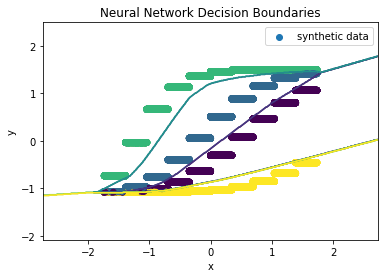

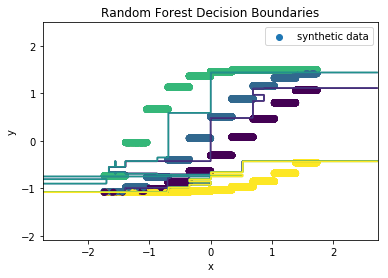

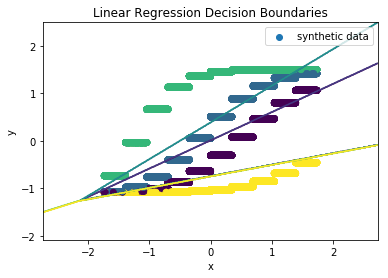

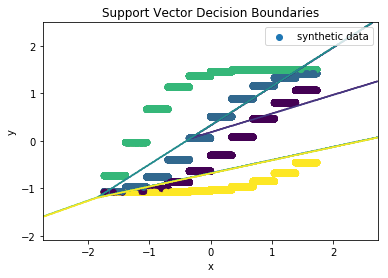

In [40]:
plt.figure()
plt.contour(xx,yy,ZNC,alpha=1)
plt.scatter(pos3[:,0],pos3[:,1],c=labels3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Decision Boundaries')


plt.figure()
plt.contour(xx,yy,ZRFC,alpha=1)
plt.scatter(pos3[:,0],pos3[:,1],c=labels3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Forest Decision Boundaries')


plt.figure()
plt.contour(xx,yy,ZLRC,alpha=1)
plt.scatter(pos3[:,0],pos3[:,1],c=labels3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Decision Boundaries')

plt.figure()
plt.contour(xx,yy,ZSVC,alpha=1)
plt.scatter(pos3[:,0],pos3[:,1],c=labels3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Support Vector Decision Boundaries')


## Thick data is synthetic data, thin lines are decision boundaries

In [21]:
#  Dataset 4

exponentialRateList = [1.5,.1,2,1]
i = 0
pos4 = []
labels4 = []

while i<1e5:
    x = np.random.uniform(low=0,high=1)
    idx = np.random.choice(4)
    y = exponentialRateList[idx]*np.exp(-x*exponentialRateList[idx])
    pos4.append([x,y])
    labels4.append(idx)
    i+=1
pos4=np.array(pos4)
labels4=np.array(labels4)

scaler = StandardScaler()  #  Scale the data for svc and linear regressor to work better
pos4 = scaler.fit_transform(pos4)

In [22]:
#  Testing the 4 models on Dataset 4

print('The accuracy of the Neural Network on exponential distribution withs varying rates is: ',np.mean(cross_val_score(bestNC,pos4,labels4,cv=5)))

print('The accuracy of the Random Forest on exponential distribution withs varying rates is: ',np.mean(cross_val_score(bestRFC,pos4,labels4,cv=5)))

print('The accuracy of the Linear Regressor on exponential distribution withs varying rates is: ',np.mean(cross_val_score(bestLRC,pos4,labels4,cv=5)))

print('The accuracy of the Support Vector on exponential distribution withs varying rates is: ',np.mean(cross_val_score(bestSVC,pos4,labels4,cv=5)))


The accuracy of the Neural Network on exponential distribution withs varying rates is:  0.9952500044861244
The accuracy of the Random Forest on exponential distribution withs varying rates is:  0.9988400014967749
The accuracy of the Linear Regressor on exponential distribution withs varying rates is:  0.6904201520765547
The accuracy of the Support Vector on exponential distribution withs varying rates is:  0.4753496939266448


In [41]:
x_min, x_max = pos4[:,0].min()-1, pos4[:,0].max()+1
y_min, y_max = pos4[:,1].min()-1, pos4[:,1].max()+1

#  Fit our models with the data
bestNC.fit(pos4,labels4)
bestRFC.fit(pos4,labels4)
bestLRC.fit(pos4,labels4)
bestSVC.fit(pos4,labels4)

#  Find the decision boundaries
xx, yy = np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
ZNC = bestNC.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
ZRFC = bestRFC.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
ZLRC = bestLRC.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
ZSVC = bestSVC.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

Text(0.5,1,'Support Vector Decision Boundaries')

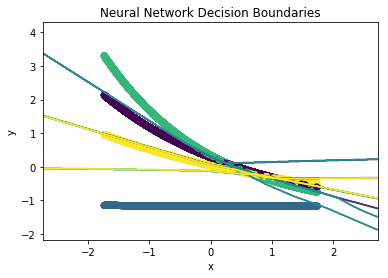

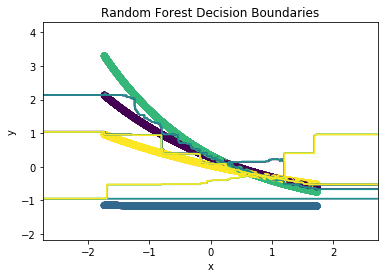

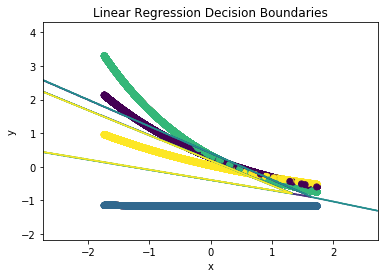

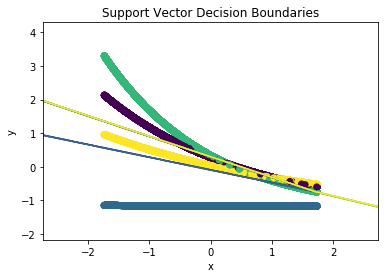

In [42]:
plt.figure()
plt.contour(xx,yy,ZNC,alpha=1)
plt.scatter(pos4[:,0],pos4[:,1],c=labels4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Decision Boundaries')

plt.figure()
plt.contour(xx,yy,ZRFC,alpha=1)
plt.scatter(pos4[:,0],pos4[:,1],c=labels4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Forest Decision Boundaries')

plt.figure()
plt.contour(xx,yy,ZLRC,alpha=1)
plt.scatter(pos4[:,0],pos4[:,1],c=labels4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Decision Boundaries')

plt.figure()
plt.contour(xx,yy,ZSVC,alpha=1)
plt.scatter(pos4[:,0],pos4[:,1],c=labels4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Support Vector Decision Boundaries')

## Thick data is synthetic data, thin lines are decision boundaries

In [24]:
#  Dataset 5

cList = [1,3,.5,5]
i = 0
pos5 = []
labels5 = []

while i<1e5:
    x = np.random.uniform(low=0,high=10)
    idx = np.random.choice(4)
    y = genlogistic.pdf(x,c=cList[idx])
    pos5.append([x,y])
    labels5.append(idx)
    i+=1
pos5=np.array(pos5)
labels5=np.array(labels5)

scaler = StandardScaler()  #  Scale the data for svc and linear regressor to work better
pos5 = scaler.fit_transform(pos5)

In [25]:
#  Testing the 4 models on Dataset 5

print('The accuracy of the Neural Network on logistic distributions is: ',np.mean(cross_val_score(bestNC,pos5,labels5,cv=5)))

print('The accuracy of the Random Forest on logistic distributions is: ',np.mean(cross_val_score(bestRFC,pos5,labels5,cv=5)))

print('The accuracy of the Linear Regressor on logistic distributions is: ',np.mean(cross_val_score(bestLRC,pos5,labels5,cv=5)))

print('The accuracy of the Support Vector on logistic distributions is: ',np.mean(cross_val_score(bestSVC,pos5,labels5,cv=5)))


C:\Users\Nic\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nic\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nic\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Nic\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

The accuracy of the Neural Network on logistic distributions is:  0.9273096029276491
The accuracy of the Random Forest on logistic distributions is:  0.999739999499675
The accuracy of the Linear Regressor on logistic distributions is:  0.32758999182737497
The accuracy of the Support Vector on logistic distributions is:  0.31862952679157386


In [36]:
x_min, x_max = pos5[:,0].min()-1, pos5[:,0].max()+1
y_min, y_max = pos5[:,1].min()-1, pos5[:,1].max()+1

#  Fit our models with the data
bestNC.fit(pos5,labels5)
bestRFC.fit(pos5,labels5)
bestLRC.fit(pos5,labels5)
bestSVC.fit(pos5,labels5)

#  Find the decision boundaries
xx, yy = np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
ZNC = bestNC.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
ZRFC = bestRFC.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
ZLRC = bestLRC.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
ZSVC = bestSVC.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

C:\Users\Nic\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5,1,'Support Vector Decision Boundaries')

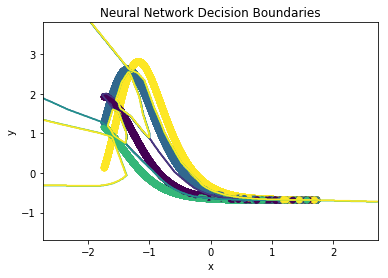

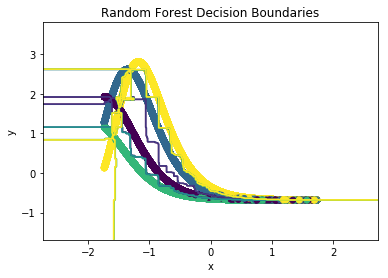

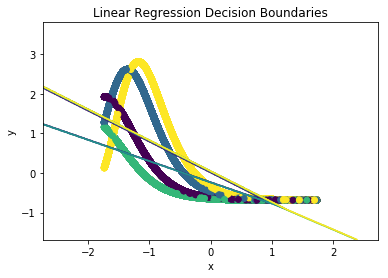

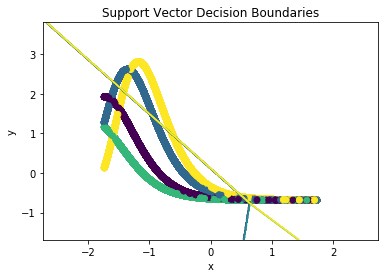

In [37]:
plt.figure()
plt.contour(xx,yy,ZNC,alpha=1)
plt.scatter(pos5[:,0],pos5[:,1],c=labels5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Decision Boundaries')

plt.figure()
plt.contour(xx,yy,ZRFC,alpha=1)
plt.scatter(pos5[:,0],pos5[:,1],c=labels5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Forest Decision Boundaries')

plt.figure()
plt.contour(xx,yy,ZLRC,alpha=1)
plt.scatter(pos5[:,0],pos5[:,1],c=labels5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Decision Boundaries')

plt.figure()
plt.contour(xx,yy,ZSVC,alpha=1)
plt.scatter(pos5[:,0],pos5[:,1],c=labels5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Support Vector Decision Boundaries')

## Thick data is synthetic data, thin lines are decision boundaries

<b> Creativity/Initiative </b> 

For the data sets I tried, I took a set region of x, and I sampled from exponentials with different decay rates for one dataset, for another I look at the PDF of genlogistic distributions with different C parameters. I also looked at a Poisson distribution PDF with different mean values, I also made a synthetic dataset with one dimensional gaussians, using different means and covariances. Finally I plotted lines with different slopes and intercepts and explored the classifiers on those as well.

Seeing as they draw from different distributions, and the overall shape of the curves is different along with intersection points and curvatures of any given pair of curves in a dataset I would argue that these span a variety of different types of synthetic datasets.

<b> Thoroughness </b>

I purely ran 5 fold cross validation with each of the models using the optimized parameters found from question 1 on each of the datasets. I also looked at the decision boundaries made by each of the classifiers on each of the data sets to understand how exactly the models were predicting the unknown data points.

<b> Insight </b>

The linear data set should be more catered towards the linear SVM I used, as well as the Logistic Regression since they both aim to classify data through a linear boundary relation. These two classifiers worked best on this specific data set (different lines) in comparison to the other data sets. 

Datasets like the Poisson CDF dataset I generated yield themselves best to both Neural Networks and Random Forests, because for the Random Forest let's say, each decision tree is easily going to be able to make decision boundaries between the curves as they are distinct for the majority of the space explored, and the neural net is able to link the curve pattern together. 

I noticed specifically that the linear regression algorithm and linear SVC algorithm both do not handle well situations where the dataset have two different classification that crossover eachother.
